In [8]:
import os
from os import path
from pathlib import Path
import pandas as pd
import numpy as np
import re
import glob

In [10]:
with open('data\yh.txt', 'r', encoding="utf8") as file:
    data = file.read().replace('\n', '')

In [12]:
data
data1 = data
data1[:333]

'烟花 (烟花 yanhua chen ): 还在挣扎554烟花 (烟花 yanhua chen ): 看得我满头问号Jr. Olyvia: 我天 刚看到group出来了Jr. Olyvia: 我和Aishwarya烟花 (烟花 yanhua chen ): 啥，下个block的？烟花 (烟花 yanhua chen ): 哦豁烟花 (烟花 yanhua chen ): 她人挺好的Jr. Olyvia: 是 快去看看Jr. Olyvia: 真的吗 催我吗烟花 (烟花 yanhua chen ): 下学期哪门课是group的啊烟花 (烟花 yanhua chen ): hhh不会Jr. Olyvia: 你看group烟花 (烟花 yanhua chen ): 她'

In [27]:
# data1.split('Jr')
raw = re.split(":|Jr. Olyvia|烟花|\(|yanhua chen|\)", data1)
raw[:5]

['', ' ', '', ' ', ' ']

In [28]:
df = pd.DataFrame({"block": np.arange(1, len(raw)+1), "txt": raw})
df.txt = df.txt.replace(['', ' '], np.nan)
df = df.dropna()
strings = df.txt.tolist()
strings

[' 还在挣扎554',
 ' 看得我满头问号',
 ' 我天 刚看到group出来了',
 ' 我和Aishwarya',
 ' 啥，下个block的？',
 ' 哦豁',
 ' 她人挺好的',
 ' 是 快去看看',
 ' 真的吗 催我吗',
 ' 下学期哪门课是group的啊',
 ' hhh不会',
 ' 你看group',
 ' 她跟javaria比较像',
 ' 那就行',
 ' 哦豁',
 ' 看到了',
 ' Yazan',
 ' 好耶',
 ' 缘分啊',
 ' 我第二次跟他组队了',
 ' capstone还是跟他一队',
 ' 这缘分',
 ' 4人吗',
 ' 嗯啊',
 ' 我就3个希望不太累',
 ' 应该还好',
 ' 我以前和yuyan 她比较认真hh',
 ' 像这次的project，三个人就可以少写点function了hh',
 ' 哎',
 ' Vu大哥都认可我们了',
 ' 相信自己',
 ' 我们是最棒棒的233',
 ' 我们被vu各种评 各种改',
 ' 其实',
 ' 最后也没仔细看他的[Lol]',
 ' 有他帮我们挑错节省了我们好多工夫。。',
 ' 我已经盲目信任他了',
 ' 我觉得他肯定是对的',
 ' 对 我们仨估计都这样了 习惯了',
 ' Aditya听说吗',
 ' 没有',
 ' 我觉得asma挺好的',
 ' 比较像javar',
 ' 真的么',
 ' Yazan就是我说的那个',
 ' 默默做很多活的大佬',
 ' 看群【。】',
 ' Mai好像跟Vu差不多性格',
 ' hhhhh',
 ' 懂了',
 ' 强强联手',
 ' 不知该说啥',
 ' 感觉alex vu mai好像差不多',
 ' 笑死',
 ' 公然吐槽',
 ' 我错了',
 ' 我应该收敛一点的',
 ' 2333',
 ' 我匿了',
 ' 没事 很公正',
 ' 我想问下那个license.md',
 ' 就直接改md file, description 右边logo就会变吗',
 ' 嗯',
 ' 是的',
 ' 我记得你当时问tiff 问啥那个logo不变？',
 ' 不得不说 我觉得我们这个好太多。基本没硬伤 都是些doc小事',
 ' after seeing others ',
 ' 对，当时没变',
 

In [29]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import jieba
from PIL import Image

In [30]:
res = []
for string in strings:
    string = string.strip()
    seg_list = jieba.cut(string)
    res+=list(seg_list)
#     print("Defualt Mode: " + '|'.join(list(seg_list)))
res[:11]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\dengj\AppData\Local\Temp\jieba.cache
Loading model cost 0.704 seconds.
Prefix dict has been built successfully.


['还', '在', '挣扎', '554', '看得', '我', '满头', '问号', '我天', ' ', '刚']

In [31]:
import stopwordsiso
from stopwordsiso import stopwords
all_stops = stopwords(['zh', 'en'])
all_stops
# mystops = ['Jr', 'Olyvia', 'UBC', 'Wen', 'Xie', '果丹皮','室', '火猪','天蓬']
# for w in mystops:
#     all_stops = all_stops.add(w)
res_nstp = [w for w in res if not w in all_stops]
res_nstp = [w for w in res_nstp if w != " "]
res_nstp;

In [55]:
# indicate the font path that can display Chinese
font_path = 'fonts/HanyiSentyBubbleTea.ttf'
d=os.getcwd()
d
mask = np.array(Image.open(path.join(d, 'imgs/mick.jpg')))
# mask
# create coloring from image
image_colors = ImageColorGenerator(mask)


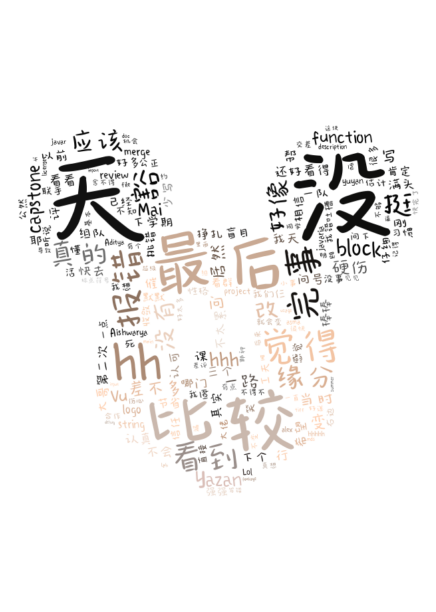

In [64]:
wc = WordCloud(font_path = font_path, mask=mask,
               background_color='white').generate(" ".join(res_nstp))

plt.figure(figsize=(10, 11))
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()